<a href="https://colab.research.google.com/github/ucfilho/ANN/blob/master/ANN_2022/Image_10/Class_009_object_detection_000_ANN_Finding_stones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network find places where there are stones

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import zipfile
%matplotlib inline

In [2]:
!git clone https://github.com/ucfilho/Machine_Learning_DataSet
%cd Machine_Learning_DataSet

fatal: destination path 'Machine_Learning_DataSet' already exists and is not an empty directory.
/content/Machine_Learning_DataSet


In [3]:
!gdown 1EMAqxWAIDJXqZv4qyAK-mDbx3X-uh7jp

Downloading...
From: https://drive.google.com/uc?id=1EMAqxWAIDJXqZv4qyAK-mDbx3X-uh7jp
To: /content/Machine_Learning_DataSet/find_stones_area.zip
100% 113M/113M [00:00<00:00, 220MB/s] 


In [4]:
FILE='find_stones_area.zip'

In [5]:
archive = zipfile.ZipFile(FILE, 'r')
archive.extractall()

In [6]:
img_name=[]
with zipfile.ZipFile(FILE, "r") as f:
    for name in f.namelist():
        img_name.append(name)

In [7]:
#img_name

In [8]:
stones2find = cv2.imread('20221103_143816quarter.jpg',0)

In [9]:
h,w = stones2find.shape
print(w,h)

1860 4032


In [10]:
stones2find.shape

(4032, 1860)

In [11]:
hi, hf = 1000, 2800
valor = hf - hi
img=np.zeros((valor,w)).astype(np.int64)

In [12]:
img.shape

(1800, 1860)

In [13]:

for i in range(valor):
  for j in range(w):
    img[i,j]=stones2find[i+hi,j]


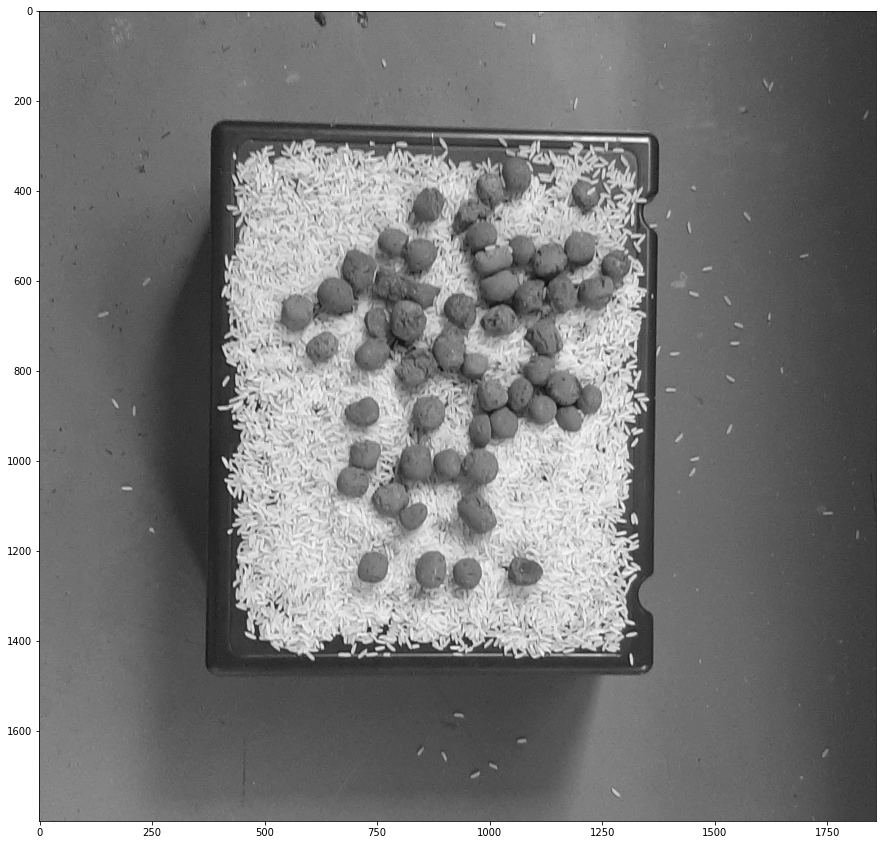

In [14]:
plt.figure(figsize=(15, 15))
plt.imshow(img, cmap='gray')

In [15]:
stones2find = img

In [16]:
nrow, ncol = stones2find.shape
nrow, ncol

(1800, 1860)

In [17]:
size = 50
horiz = int(nrow/size)
vert = int(ncol/size)
segmentation = []
for i in range(horiz):
  h = i*size
  for j in range(vert):
    w = j*size
    img=np.zeros((size,size)).astype(np.int64)
    for ii in range(size):
      for jj in range(size):
        img[ii,jj] = stones2find[ii+h,jj+w]
    
    segmentation.append(img)



#plt.figure(figsize=(5,5))
#plt.imshow(img)

In [18]:
len(segmentation)

1332

In [19]:
horiz*vert

1332

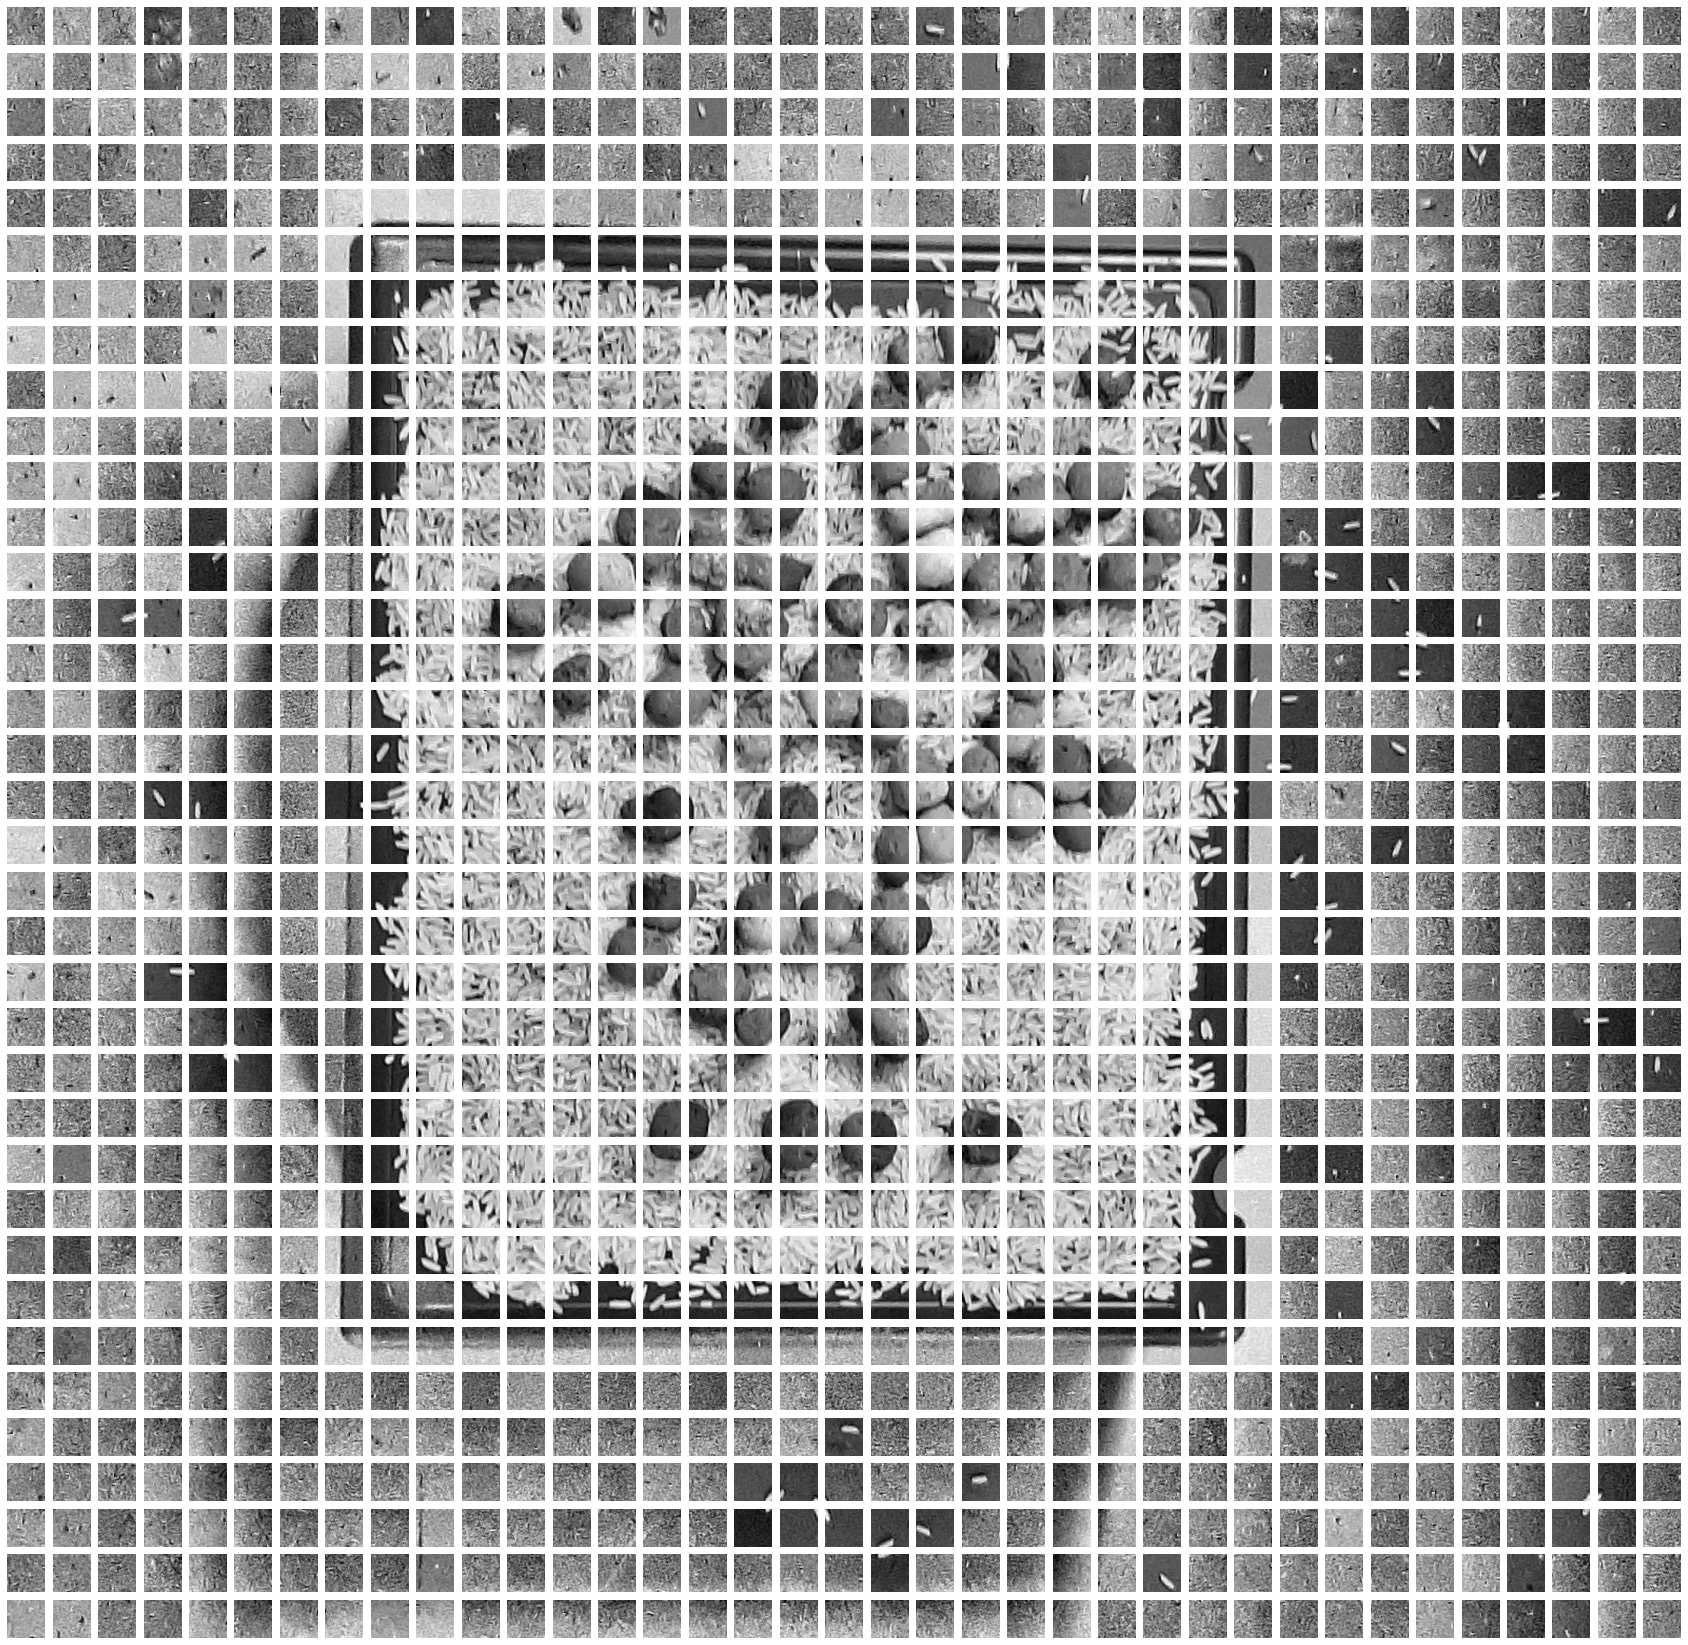

In [20]:
plt.figure(figsize=(30, 30))
n = horiz*vert
for i in range(n): 
  ax = plt.subplot(horiz, vert, i + 1)
  plt.imshow(segmentation[i], cmap="gray")
  #plt.title(i)
  plt.axis("off")

In [21]:
horiz


36

In [22]:
y = []
# y = 1 suport

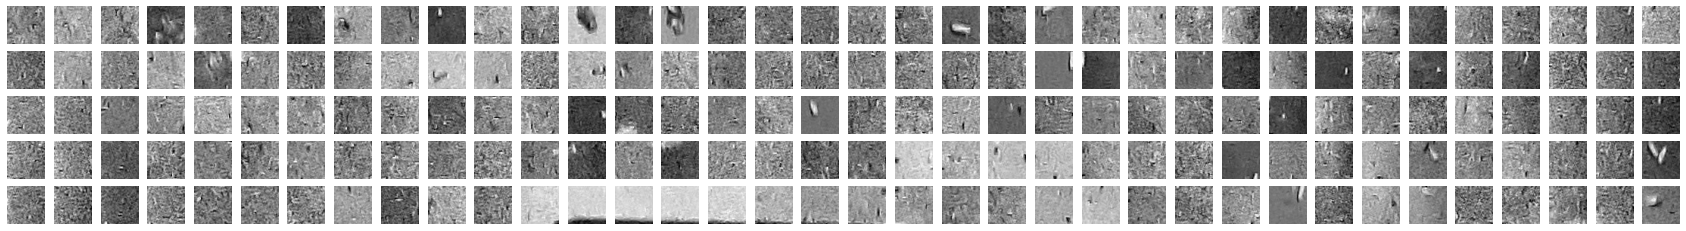

In [23]:
plt.figure(figsize=(30, 4))
vert_sub = 5
n = horiz*vert_sub
for i in range(n): 
  ax = plt.subplot(vert_sub,horiz , i + 1)
  plt.imshow(segmentation[i], cmap="gray")
  y.append(0)
  plt.axis("off")

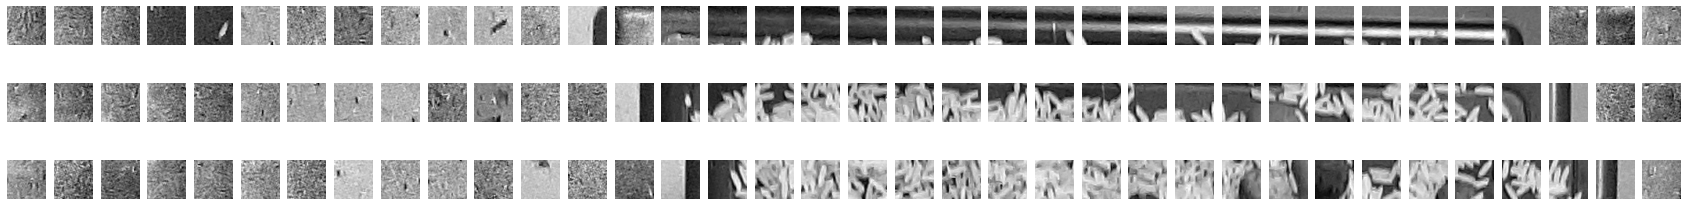

In [24]:
y_back = [] + y
nref = len(y_back)
plt.figure(figsize=(30, 4))
vert_sub = 3
n = horiz*vert_sub
for i in range(n): 
  ax = plt.subplot(vert_sub ,horiz, i + 1)
  plt.imshow(segmentation[i+nref], cmap="gray")
  plt.axis("off")

# first line sum = 36
for i in range(13):
  y.append(0)
for i in range(19):
  y.append(1)
for i in range(4):
  y.append(0)

# second line sum = 36
for i in range(13): # sum = 13
  y.append(0)
for i in range(2): # sum = 15
  y.append(1)
for i in range(12): # sum = 27
  y.append(2) # y=2 means white grains
for i in range(1): # sum = 28
  y.append(3) # y=3 means stone
for i in range(4): # sum = 32
  y.append(2)
for i in range(2): # sum = 34
  y.append(1)
for i in range(2): # sum = 36
  y.append(0)

# third line sum = 36
for i in range(14): # sum = 14
  y.append(0)
for i in range(2): # sum = 16
  y.append(1)
for i in range(10): # sum = 26
  y.append(2) # y=2 means white grains
for i in range(3): # sum = 29
  y.append(3) # y=3 means stone
for i in range(2): # sum = 31
  y.append(2)
for i in range(2): # sum = 32 (can be 1 instead of 2?)
  y.append(3)
for i in range(1): # sum = 33
  y.append(0)
for i in range(2): # sum = 35
  y.append(1)
for i in range(1): # sum = 36
  y.append(0)

In [25]:
len(y), len(y_back)

(289, 180)